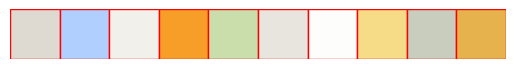

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import os
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.patches as patches

def find_representative_colors(dataset_path, n_colors=9, n_samples_per_image=5000):
    # Initialize an empty array for storing sampled pixels
    sample_pixels = np.empty((0, 3), dtype=int)

    for img_name in os.listdir(dataset_path):
        img = Image.open(os.path.join(dataset_path, img_name))
        
        w, h = img.size
        img = img.crop((w // 2, 0, w, h))  # Crop the right half of the image

        # Convert to NumPy array
        np_img = np.array(img)

        # Randomly sample pixels from the image
        idx = np.random.choice(np_img.shape[0] * np_img.shape[1], n_samples_per_image, replace=False)
        sampled_pixels = np_img.reshape(-1, 3)[idx]

        # Append sampled pixels to the array
        sample_pixels = np.vstack((sample_pixels, sampled_pixels))

    # Apply KMeans to find color centers
    # Explicitly setting n_init to 'auto' to suppress the warning and future-proof the code
    kmeans = KMeans(n_clusters=n_colors, random_state=0, n_init='auto').fit(sample_pixels)
    return kmeans.cluster_centers_

def create_masks_from_image_and_save_plot(image, color_centers, save_path):
    # Convert PIL Image to NumPy array
    np_image = np.array(image)

    # Reshape image and assign each pixel to the nearest color center
    pixels = np_image.reshape(-1, 3)
    nearest_centers = np.argmin(np.linalg.norm(pixels - color_centers[:, np.newaxis], axis=2), axis=0)
    clustered_image = color_centers[nearest_centers].reshape(np_image.shape).astype(np.uint8)

    # Split masks into binary masks for each color center
    masks = nearest_centers.reshape(np_image.shape[:2])
    binary_masks = [(masks == i).astype(int) for i in range(len(color_centers))]

    # Number of rows and columns for subplots
    n_rows = 1 + len(binary_masks) // 2
    n_cols = 2

    # Plotting the original and clustered images
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6))
    axs[0, 0].imshow(np_image)
    axs[0, 0].set_title("Original Map")
    axs[0, 0].axis('off')

    axs[0, 1].imshow(clustered_image)
    axs[0, 1].set_title("Clustered Map")
    axs[0, 1].axis('off')

    # Plotting each binary mask
    for i, mask in enumerate(binary_masks):
        row = (i + 2) // 2
        col = (i + 2) % 2
        axs[row, col].imshow(mask, cmap='gray')
        axs[row, col].set_title(f"Mask {i+1}")
        axs[row, col].axis('off')

    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

    return binary_masks

def visualize_color_centers(color_centers):
    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Number of colors
    n_colors = len(color_centers)

    # Add a rectangle patch for each color
    for i, color in enumerate(color_centers):
        # Normalize color values to [0, 1] as expected by matplotlib
        color_normalized = color / 255.0
        rect = patches.Rectangle((i, 0), 1, 1, linewidth=1, edgecolor='r', facecolor=color_normalized)
        ax.add_patch(rect)

    # Set the limits and aspect of the plot
    ax.set_xlim(0, n_colors)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')  # Turn off the axis

    plt.show()

# Example Usage
dataset_path = 'data/train'
color_centers = find_representative_colors(dataset_path, n_colors=10)
visualize_color_centers(color_centers)

img = Image.open(os.path.join(dataset_path, '234.jpg'))
        
w, h = img.size
img = img.crop((w // 2, 0, w, h))

masks = create_masks_from_image_and_save_plot(img, color_centers, "image.png")

In [6]:
img = Image.open(os.path.join(dataset_path, '24.jpg'))
        
w, h = img.size
img = img.crop((w // 2, 0, w, h))

masks = create_masks_from_image_and_save_plot(img, color_centers, "image.png")

In [2]:
color_centers

array([[222.54114006, 218.19486678, 209.03655732],
       [176.39517098, 207.36533546, 253.68176394],
       [242.3009299 , 240.07981674, 234.13577431],
       [245.81090326, 157.79299076,  38.5570436 ],
       [202.48862628, 222.39955981, 172.18012607],
       [232.15995471, 228.71470255, 222.00992067],
       [253.46324374, 253.25226467, 251.16236616],
       [247.36335589, 220.42228868, 136.22587754],
       [200.00481359, 205.19318739, 189.33936565],
       [230.09122322, 177.85173569,  78.10472596]])